# kNN basic practice

## sklearn.neighbors

docs: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

examples: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

In [90]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Toy task - only 2 features

In [22]:
classification_problem = datasets.make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2, 
    n_classes=3, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=3,
)

In [31]:
classification_problem[1]

array([2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1,
       0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2,
       1, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1,
       1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1,
       2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0,
       0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0,
       2, 0, 0, 1, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0,
       0, 0])

In [28]:
def plot_dataset(dataset):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], 
                c=dataset[1], cmap=colors, s=50)
    plt.show()

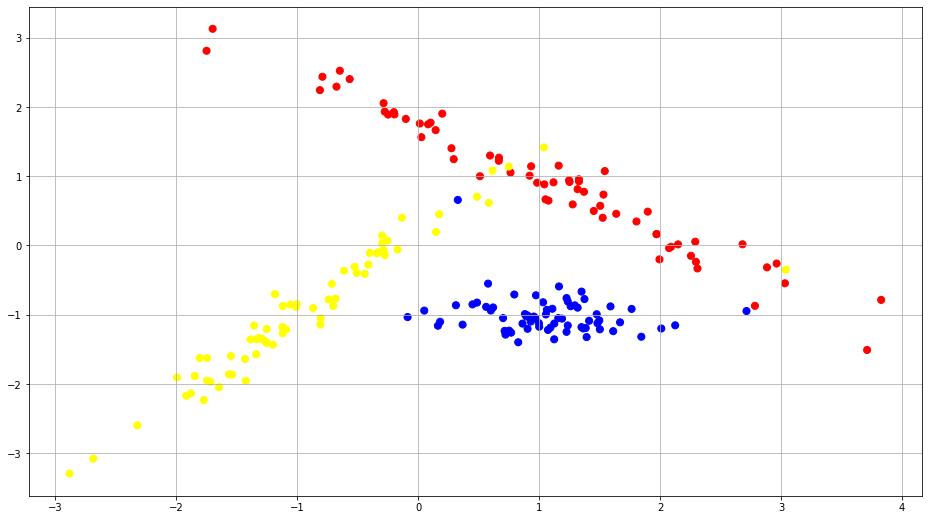

In [29]:
plot_dataset(classification_problem)

In [32]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1], 
    test_size=0.3,
    random_state=1,
)

# Let's build our model!

In [35]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.9666666666666667

In [42]:
dir(metrics)

['ConfusionMatrixDisplay',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'calinski_harabaz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'davies_bouldin_score',
 'dcg_score',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_score',
 'jaccard_similarity_score'

In [37]:
predictions

array([2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2])

### And visualize

In [45]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [46]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1, 2, 2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

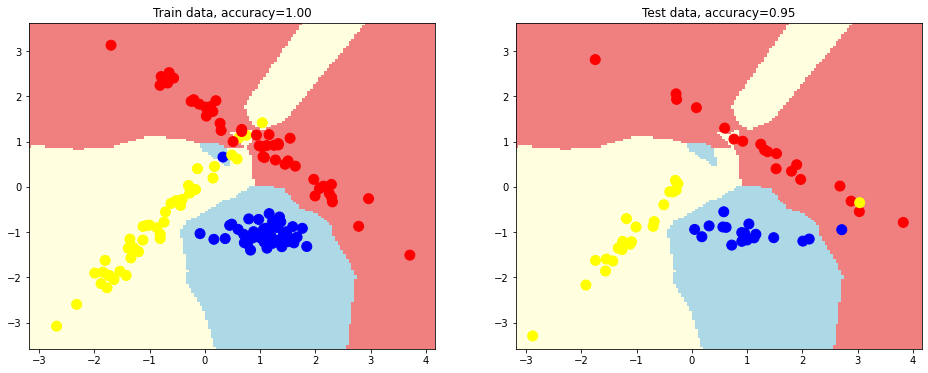

In [47]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

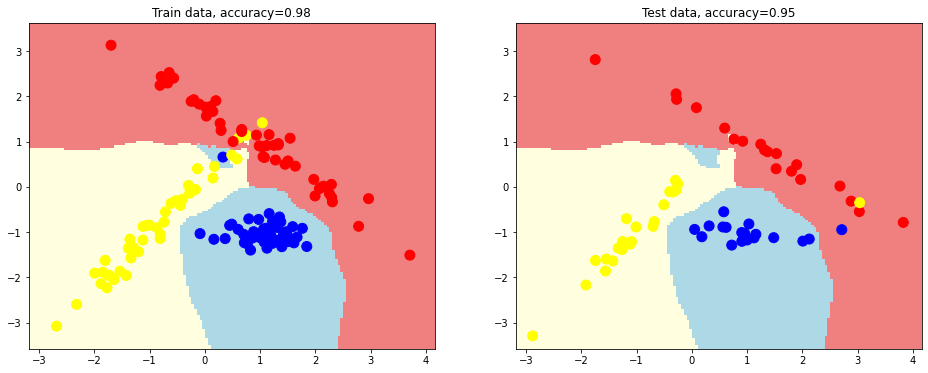

In [48]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

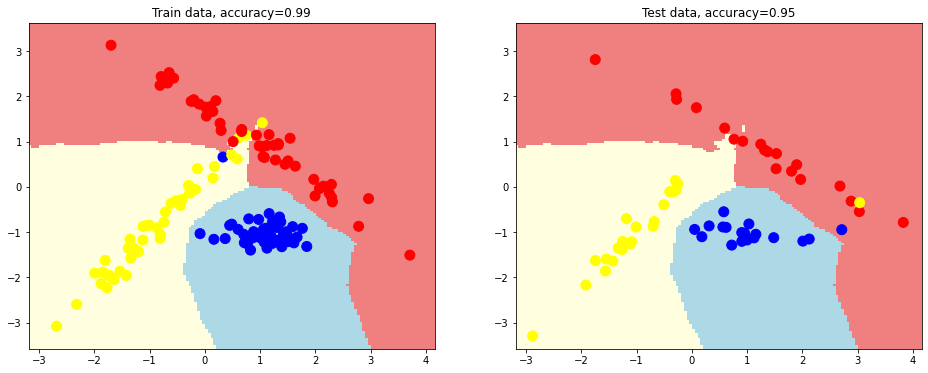

In [49]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

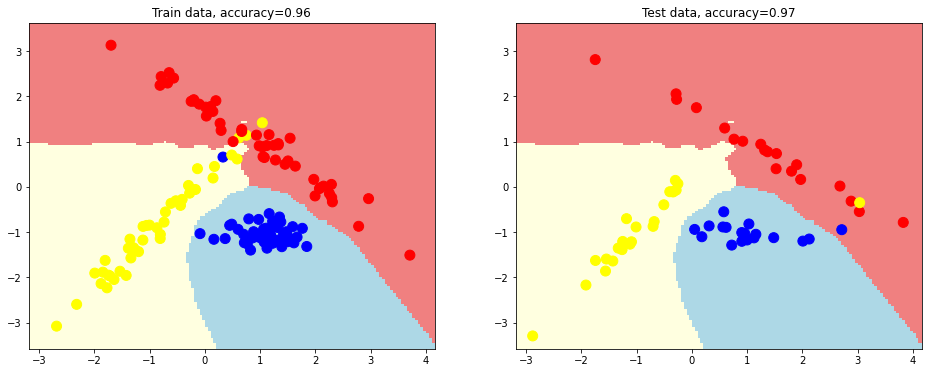

In [50]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

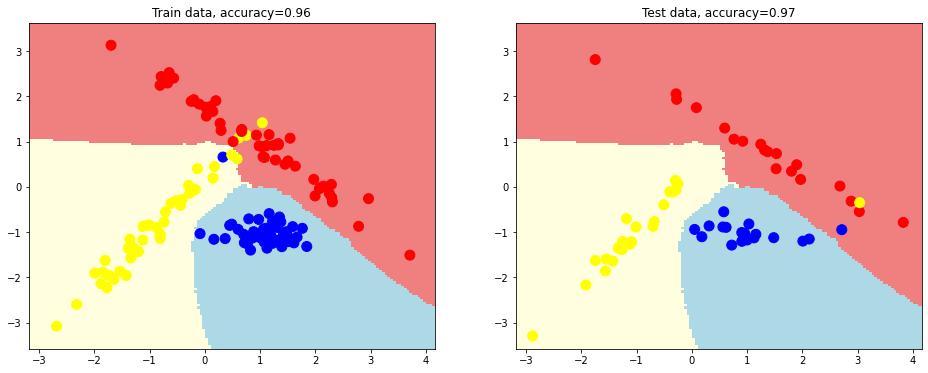

In [51]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

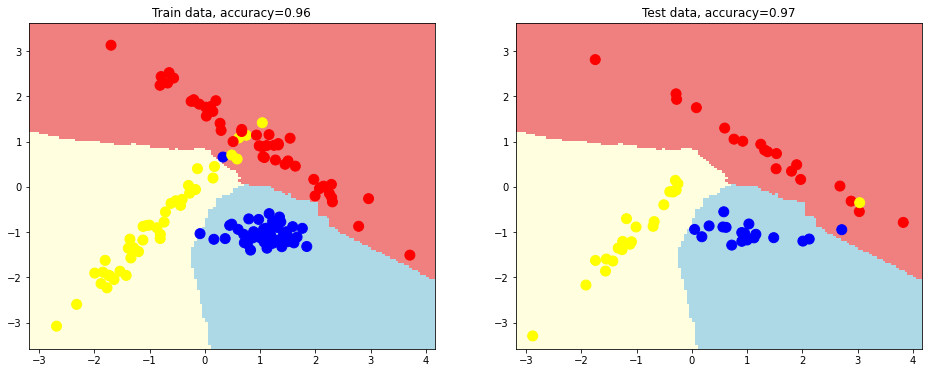

In [52]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

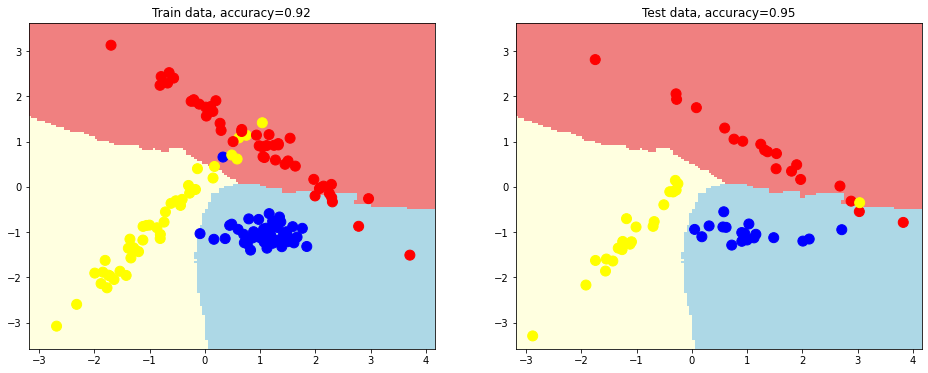

In [53]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

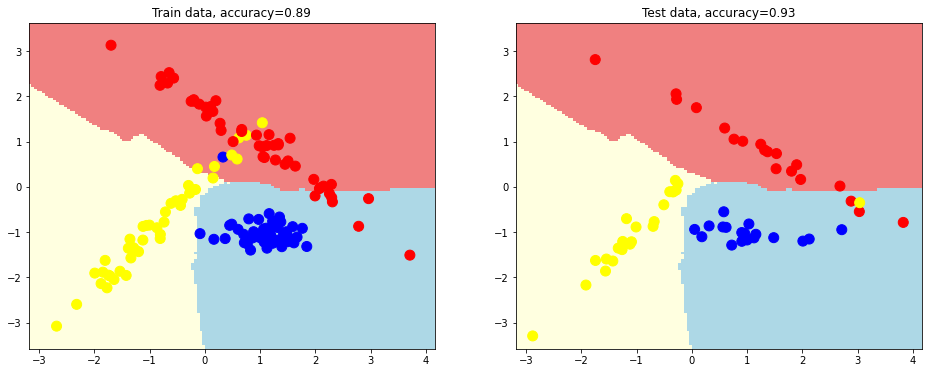

In [54]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

## Seems good!

In [55]:
hard_problem = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50, 
    n_classes=3,
    n_redundant=50, 
    n_clusters_per_class=1,
    random_state=42,
)

In [56]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    hard_problem[0], 
    hard_problem[1], 
    test_size=0.3,
    random_state=1,
)

In [57]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.6

## Or not so good...

In [59]:
def train_knn_classifier(dimensions, n_classes):
    scores = []
    
    for dim in dimensions:
        problem = datasets.make_classification(n_samples=1000, n_features=dim, n_informative=dim // 2, 
                                               n_classes=5, n_redundant=dim // 2, 
                                               n_clusters_per_class=1, random_state=42)

        train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
            problem[0],
            problem[1],
            test_size=0.3,
            random_state=1,
        )

        clf = neighbors.KNeighborsClassifier(n_neighbors=5)
        clf.fit(train_data, train_labels)

        predictions = clf.predict(test_data)
        acc = metrics.accuracy_score(test_labels, predictions)

        scores.append(acc)

    plt.figure(figsize=(16, 9))
    plt.plot(dimensions, scores)
    plt.show()

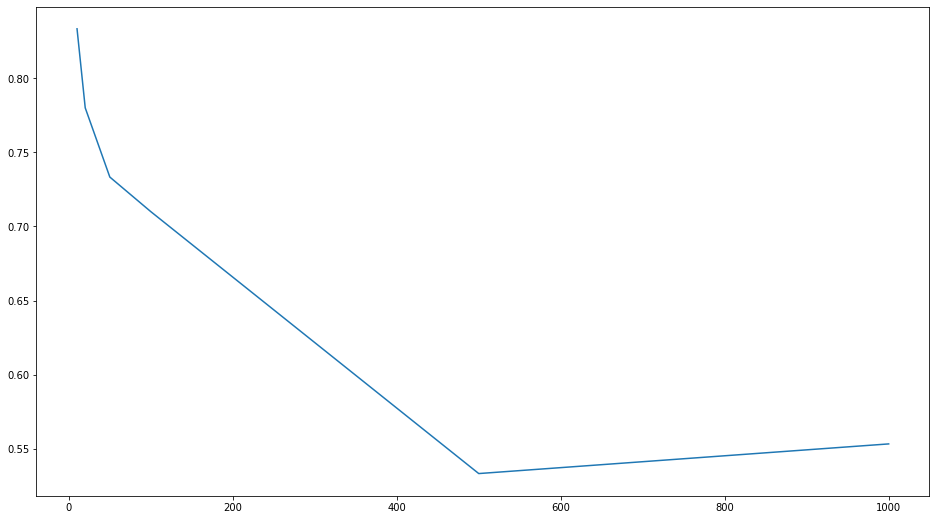

In [60]:
train_knn_classifier([10, 20, 50, 100, 500, 1000], 5)

# Practice area

Now let's try and train a simple (or not so) kNN classifier on a more complicated dataset.

In [61]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data > ./wine_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10782  100 10782    0     0   4562      0  0:00:02  0:00:02 --:--:--  4560


In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('wine_data.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X = dataset.drop(0, axis=1).values
y = dataset[0].values


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [16]:
from sklearn.metrics import accuracy_score
from sklearn import model_selection, datasets, metrics, neighbors
from matplotlib import pyplot as plt

def measure_quality(predictions):
    return accuracy_score(y_test, predictions)

# Bonus area
### Those who get accuracy of at least 0.8 get bonus [0.5 max]

In [8]:
def decisions(num_neighbors, train_data, train_labels, test_data, test_labels):
    
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=num_neighbors)
    knn_clf.fit(train_data, train_labels)
    
    predictions = knn_clf.predict(test_data)
    acc = metrics.accuracy_score(test_labels, predictions)
    
    return acc

In [17]:
def optimal_neighbor(train_data, train_labels, test_data, test_labels, max_num_neighbors = 30):
    
    optimal = {'accuracy': 0, 'num_neighbors': 0}
    accuracy_scores = []

    neighb = range(1, max_num_neighbors)
    
    for num_neighbors in neighb:
        acc = decisions(num_neighbors, train_data, train_labels, test_data, test_labels)
        accuracy_scores.append(acc)
        
        if acc > optimal['accuracy']:
            optimal['accuracy'], optimal['num_neighbors'] = acc, num_neighbors
        
    print(optimal)
    plt.figure(figsize=(16, 9))
    plt.plot(neighb, accuracy_scores)
    plt.show()    

{'accuracy': 0.8333333333333334, 'num_neighbors': 34}


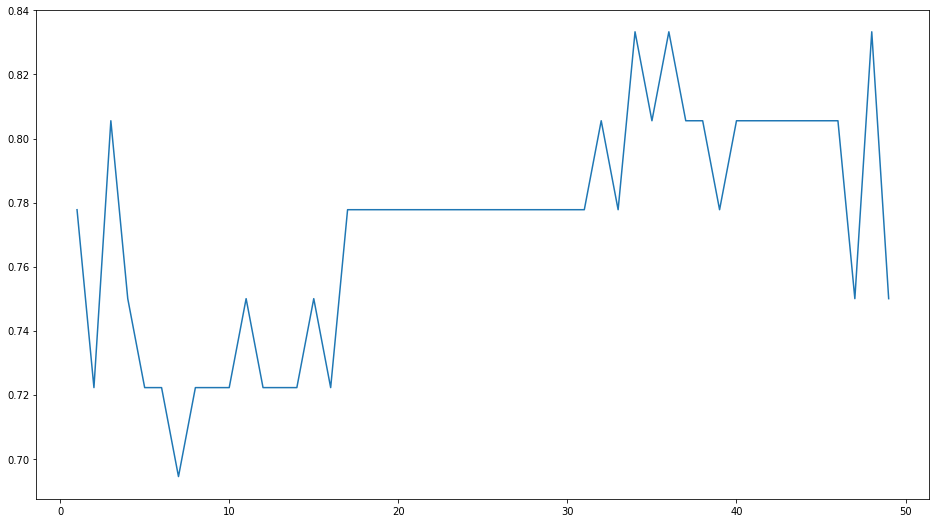

In [19]:
optimal_neighbor(X_train, y_train, X_test, y_test, 50)

In [32]:
# print(measure_quality(y_pred))